<a href="https://colab.research.google.com/github/Shivamani162/EAI_lab/blob/main/XAI_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2303A52344 B-38**

**Problem-1**

Linear Regression Equation: y = 10.00 + 5.00x
Slope Interpretation: Each extra TV ad increases sales by 5.00 cars.
Intercept Interpretation: 10.00 cars expected with 0 ads.
Predicted Cars Sold (10 ads): 60.00

SHAP Values for All Instances:
   Number of TV Ads (x)  Number of Cars Sold (y)  SHAP value for TV Ads
0                     1                       14                   -5.0
1                     3                       24                    5.0
2                     2                       18                    0.0
3                     1                       17                   -5.0
4                     3                       27                    5.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


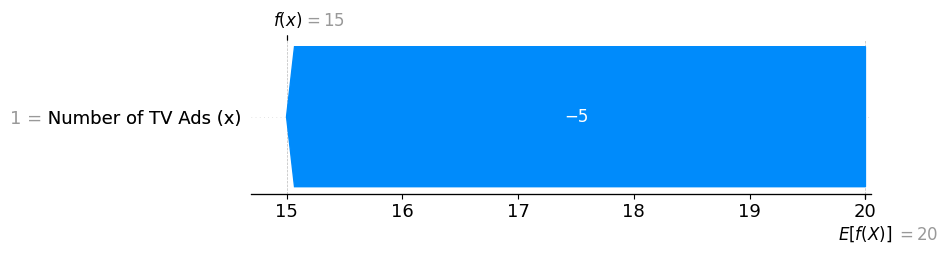

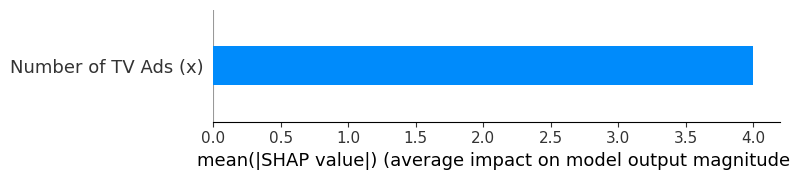

In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel("Car_Sales.xlsx")

X = df[['Number of TV Ads (x)']]
y = df['Number of Cars Sold (y)']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation: y = {intercept:.2f} + {slope:.2f}x")
print(f"Slope Interpretation: Each extra TV ad increases sales by {slope:.2f} cars.")
print(f"Intercept Interpretation: {intercept:.2f} cars expected with 0 ads.")

pred = model.predict([[10]])[0]
print(f"Predicted Cars Sold (10 ads): {pred:.2f}")

if not hasattr(np, 'bool'):
    np.bool = bool

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap_df = pd.DataFrame(shap_values.values, columns=['SHAP value for TV Ads'])
result_df = pd.concat([df.reset_index(drop=True), shap_df], axis=1)
print("\nSHAP Values for All Instances:")
print(result_df)

shap.plots.waterfall(shap_values[0])
plt.show()

shap.plots.force(shap_values)


shap.summary_plot(shap_values, X, plot_type="bar")
plt.show()


**Problem-2**

Linear Regression Equation: y = 20.00 + 0.50*IQ + 0.50*StudyHours
Coefficient of IQ: Each 1-point increase in IQ changes score by 0.50.
Coefficient of Study Hours: Each extra study hour changes score by 0.50.
Intercept: 20.00 is the expected score when IQ=0 and StudyHours=0.
Predicted Test Score (IQ=95, StudyHours=25): 80.00

SHAP Values for All Instances:
   IQ \n  StudyHours  TestScore  SHAP value for IQ  SHAP value for StudyHours
0    110          40        100                5.0                       10.0
1    120          30         90               10.0                        5.0
2    100          20         80                0.0                        0.0
3     90           0         70               -5.0                      -10.0
4     80          10         60              -10.0                       -5.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


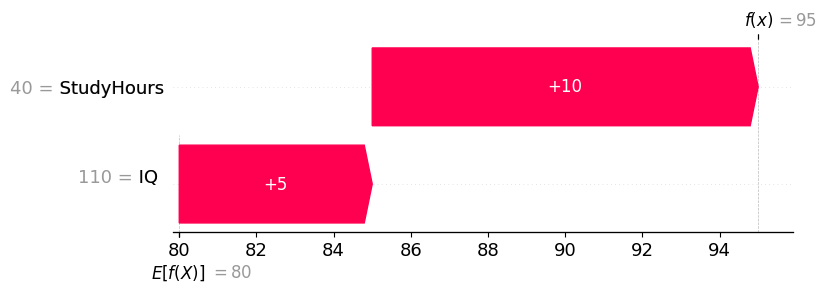

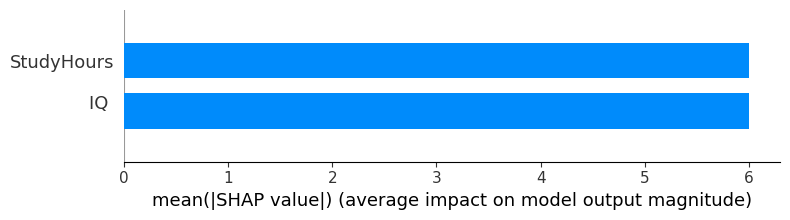

In [2]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel("StudyHour.xlsx")

X = df[['IQ \n', 'StudyHours']]
y = df['TestScore']

model = LinearRegression()
model.fit(X, y)

coef_iq = model.coef_[0]
coef_hours = model.coef_[1]
intercept = model.intercept_

print(f"Linear Regression Equation: y = {intercept:.2f} + {coef_iq:.2f}*IQ + {coef_hours:.2f}*StudyHours")
print(f"Coefficient of IQ: Each 1-point increase in IQ changes score by {coef_iq:.2f}.")
print(f"Coefficient of Study Hours: Each extra study hour changes score by {coef_hours:.2f}.")
print(f"Intercept: {intercept:.2f} is the expected score when IQ=0 and StudyHours=0.")

pred = model.predict([[95, 25]])[0]
print(f"Predicted Test Score (IQ=95, StudyHours=25): {pred:.2f}")

if not hasattr(np, 'bool'):
    np.bool = bool

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap_df = pd.DataFrame(shap_values.values, columns=['SHAP value for IQ', 'SHAP value for StudyHours'])
result_df = pd.concat([df.reset_index(drop=True), shap_df], axis=1)
print("\nSHAP Values for All Instances:")
print(result_df)

shap.plots.waterfall(shap_values[0], show=False)
plt.show()

shap.force_plot(explainer.expected_value, shap_values.values, X, show=False)
plt.show()


shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.show()

**Problem-3**

Linear Regression Equation: y = 25792.20 + 9449.96x
Slope Interpretation: Each extra year of experience increases salary by 9449.96.
Intercept Interpretation: 25792.20 is the expected salary for 0 years of experience.
Predicted Salary (3.5 years): 58867.07
Predicted Salary (7 years): 91941.94

SHAP Values for All Instances:
    YearsExperience  Salary  SHAP value for YearsExperience
0               1.1   39343                   -39815.841248
1               1.3   46205                   -37925.848783
2               1.5   37731                   -36035.856319
3               2.0   43525                   -31310.875158
4               2.2   39891                   -29420.882694
5               2.9   56642                   -22805.909069
6               3.0   60150                   -21860.912837
7               3.2   54445                   -19970.920373
8               3.2   64445                   -19970.920373
9               3.7   57189                   -15245.939212
10            

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


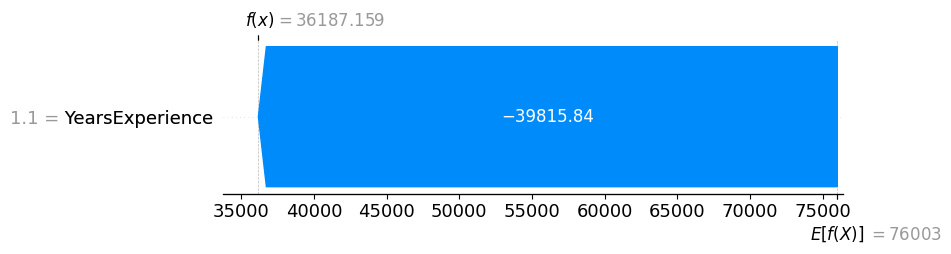

Showing SHAP Force Plot for all predictions...
Showing SHAP Summary Plot...


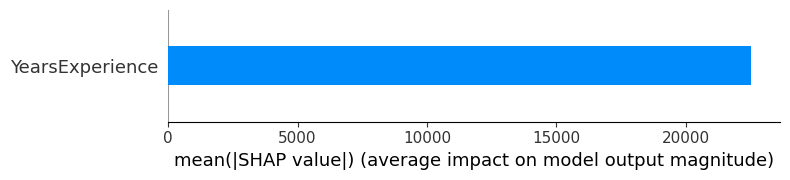

In [3]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Experience_Salary.csv")

X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation: y = {intercept:.2f} + {slope:.2f}x")
print(f"Slope Interpretation: Each extra year of experience increases salary by {slope:.2f}.")
print(f"Intercept Interpretation: {intercept:.2f} is the expected salary for 0 years of experience.")

pred_3_5 = model.predict([[3.5]])[0]
pred_7 = model.predict([[7]])[0]
print(f"Predicted Salary (3.5 years): {pred_3_5:.2f}")
print(f"Predicted Salary (7 years): {pred_7:.2f}")

if not hasattr(np, 'bool'):
    np.bool = bool

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap_df = pd.DataFrame(shap_values.values, columns=['SHAP value for YearsExperience'])
result_df = pd.concat([df.reset_index(drop=True), shap_df], axis=1)
print("\nSHAP Values for All Instances:")
print(result_df)

print("Showing SHAP Waterfall Plot for first prediction...")
shap.plots.waterfall(shap_values[0], show=False)
plt.show()

print("Showing SHAP Force Plot for all predictions...")
shap.force_plot(explainer.expected_value, shap_values.values, X)

print("Showing SHAP Summary Plot...")
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.show()

**Problem-4**

Model: Sales = 8.22*Int + 49.71*Ext + 993.92
Prediction for Int=100, Ext=25: 3058.63
Prediction for Int=120, Ext=18: 2875.07


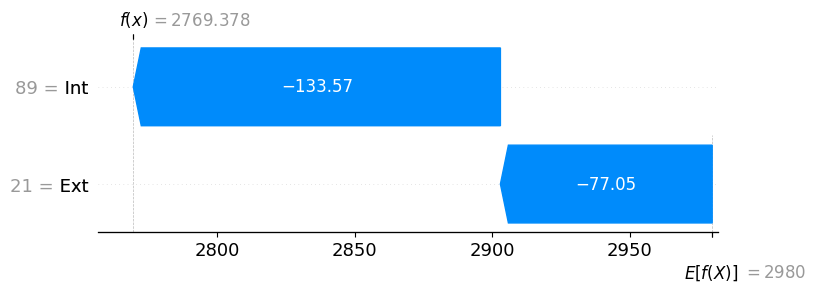

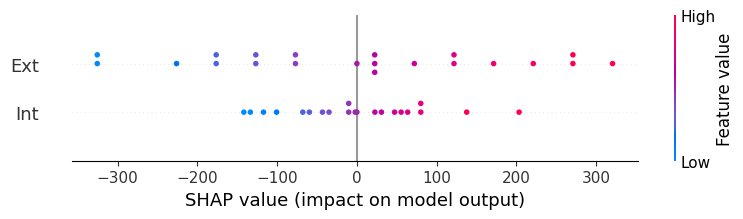


Salesperson 1:
Base value: 2980.00
Intelligence contribution: -133.57
Extroversion contribution: -77.05
Final predicted sales: 2769.38
Intelligence contributes MORE

Salesperson 2:
Base value: 2980.00
Intelligence contribution: -100.69
Extroversion contribution: 72.08
Final predicted sales: 2951.38
Intelligence contributes MORE

Salesperson 3:
Base value: 2980.00
Intelligence contribution: -117.13
Extroversion contribution: -77.05
Final predicted sales: 2785.82
Intelligence contributes MORE

Salesperson 4:
Base value: 2980.00
Intelligence contribution: 137.68
Extroversion contribution: 22.37
Final predicted sales: 3140.05
Intelligence contributes MORE

Salesperson 5:
Base value: 2980.00
Intelligence contribution: 80.14
Extroversion contribution: 221.20
Final predicted sales: 3281.35
Extroversion contributes MORE

Salesperson 6:
Base value: 2980.00
Intelligence contribution: -43.15
Extroversion contribution: -226.17
Final predicted sales: 2710.67
Extroversion contributes MORE

Salesper

In [4]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

shap.initjs()

df = pd.read_excel("Int_Ext.xlsx")
df = df[['Int', 'Ext', 'sal']].dropna()

X = df[['Int', 'Ext']]
y = df['sal']

model = LinearRegression()
model.fit(X, y)

print(f"Model: Sales = {model.coef_[0]:.2f}*Int + {model.coef_[1]:.2f}*Ext + {model.intercept_:.2f}")

pred_1 = model.predict(pd.DataFrame([[100, 25]], columns=['Int', 'Ext']))[0]
pred_2 = model.predict(pd.DataFrame([[120, 18]], columns=['Int', 'Ext']))[0]

print(f"Prediction for Int=100, Ext=25: {pred_1:.2f}")
print(f"Prediction for Int=120, Ext=18: {pred_2:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values[0])
shap.summary_plot(shap_values, X)

for i in range(len(X)):
    int_contrib = shap_values.values[i][0]
    ext_contrib = shap_values.values[i][1]
    base_value = shap_values.base_values[i]
    predicted = model.predict(pd.DataFrame([X.iloc[i]], columns=X.columns))[0]
    print(f"\nSalesperson {i+1}:")
    print(f"Base value: {base_value:.2f}")
    print(f"Intelligence contribution: {int_contrib:.2f}")
    print(f"Extroversion contribution: {ext_contrib:.2f}")
    print(f"Final predicted sales: {predicted:.2f}")
    if abs(int_contrib) > abs(ext_contrib):
        print("Intelligence contributes MORE")
    else:
        print("Extroversion contributes MORE")

**Problem-5**

Model: y = 0.20*facebook + 0.01*newspaper + 11.00
Prediction for Facebook=50, Newspaper=70: 21.44
Prediction for Facebook=25, Newspaper=30: 16.18


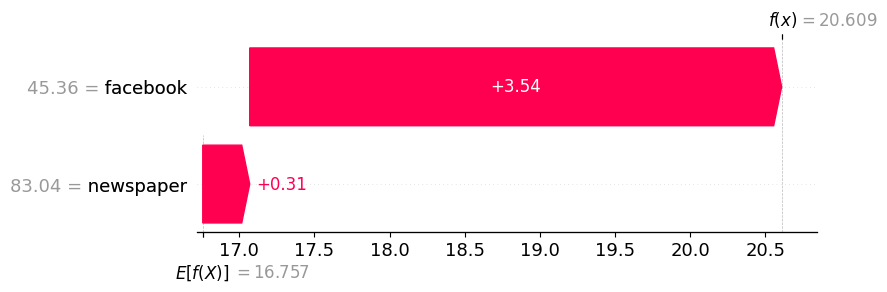

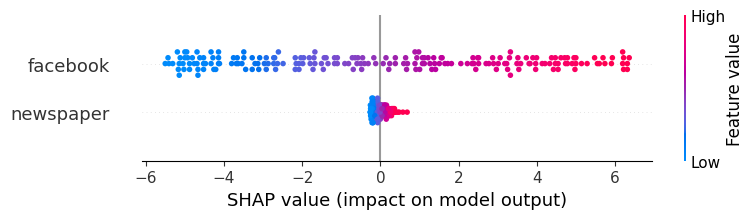

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap

df = pd.read_excel("/content/Marketing_Dataset.xlsx")
df = df[['facebook', 'newspaper', 'sales']].dropna()

X = df[['facebook', 'newspaper']]
y = df['sales']

model = LinearRegression()
model.fit(X, y)

print(f"Model: y = {model.coef_[0]:.2f}*facebook + {model.coef_[1]:.2f}*newspaper + {model.intercept_:.2f}")

print(f"Prediction for Facebook=50, Newspaper=70: {model.predict(pd.DataFrame([[50, 70]], columns=['facebook', 'newspaper']))[0]:.2f}")
print(f"Prediction for Facebook=25, Newspaper=30: {model.predict(pd.DataFrame([[25, 30]], columns=['facebook', 'newspaper']))[0]:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], show=True)
shap.force_plot(explainer.expected_value, shap_values[0].values, X.iloc[0])
shap.summary_plot(shap_values, X)

